## Using Yahoo Finance to find stock market data -> Apple Stock

## The stock market runs from Monday - Friday, 9:30 A.M - 4 P.M.

In [6]:
from bs4 import BeautifulSoup #this will be the core to importing and webscraping
import requests
import time
import datetime
from datetime import datetime
from dateutil import rrule
from dateutil.relativedelta import relativedelta
import csv
import pandas as pd # -> library to turn our data into a data frame

import smtplib

In [7]:
import datetime
weekday = datetime.datetime.today().weekday()
#print(weekday)

In [8]:
dailyPrice = None
change = None
headers = ["Stock Name", "Stock Price", "Net Change", "Time"]
data = None #list data type


### Run once for the entirety of the dataset

In [3]:

with open('StockMarketData.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(headers)

In [9]:
import time
from datetime import datetime, timedelta

currTime = datetime.now()

timeSort = currTime.strftime("%H:%M:%S")
#print(type(timeSort))
#print(currTime.hour)

In [10]:
def price_check():
    url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL'
    header = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url, headers = header)

    soup1 = BeautifulSoup(page.content, "html.parser")
    soup2 = BeautifulSoup(soup1.prettify(), "html.parser") #make this much Simpler and easier to parse
    soup2.text.strip()
    info = soup2.find('div',{'class': 'D(ib) Mend(20px)' })
    dailyPrice = info.find('fin-streamer').text.strip()
    print("Price of stock today: " + dailyPrice)
    #above, I have gathered the information about the Apple stock and scraped the price of the stock and changes 
    #  -> which will change daily because of the stock market changes
    
    change = info.find('span').text.strip() #finds the change of the price daily from yesterday's to today's prices
    print("change in price: " + change)
    
    currTime = datetime.now()
    timeSort = currTime.strftime("%H:%M:%S")
    print("Time: " + timeSort)

    data = ["AAPL", dailyPrice, change, timeSort] 
    with open('StockMarketData.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data) 

        

#####
<div class="D(ib) Mend(20px)">
<fin-streamer active="" class="Fw(b) Fz(36px) Mb(-4px) D(ib)" data-field="regularMarketPrice" data-pricehint="2" data-symbol="AAPL" data-test="qsp-price" data-trend="none" value="155.81">
                  155.81
                 </fin-streamer>
<fin-streamer active="" class="Fw(500) Pstart(8px) Fz(24px)" data-field="regularMarketChange" data-pricehint="2" data-symbol="AAPL" data-test="qsp-price-change" data-trend="txt" value="-2.1500092">
<span class="C($negativeColor)">
                   -2.15
                  </span>
</fin-streamer>
<fin-streamer active="" class="Fw(500) Pstart(8px) Fz(24px)" data-field="regularMarketChangePercent" data-pricehint="2" data-symbol="AAPL" data-template="({fmt})" data-trend="txt" value="-0.013611097">
<span class="C($negativeColor)">
                   (-1.36%)
                  </span>
</fin-streamer>
<fin-streamer active="true" changeev="regularTimeChange" class="D(n)" data-field="regularMarketTime" data-symbol="AAPL" data-trend="none" value="">
</fin-streamer>
<fin-streamer active="true" changeev="marketState" class="D(n)" data-field="marketState" data-symbol="AAPL" data-trend="none" value="">
</fin-streamer>
<div class="C($tertiaryColor) D(b) Fz(12px) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm Whs(n)" id="quote-market-notice">
<span>
                   At close:  04:00PM EDT
                  </span>
                  

In [8]:

while(currTime.hour >= 9.5 and currTime.hour < 16 and weekday <= 4): #only run 9:30 - 4 Mon. - Fri.
    price_check()    
    time.sleep(299) #will run after (299) seconds + 1 sec. of execution of above line -> 5 Minutes

### Producing graphs from data

   Stock Name  Stock Price  Net Change      Time
0        AAPL       154.80        0.27  09:30:12
1        AAPL       155.31        0.78  09:35:12
2        AAPL       155.72        1.19  09:40:12
3        AAPL       155.55        1.02  09:45:12
4        AAPL       155.64        1.11  09:50:12
5        AAPL       155.36        0.83  09:55:13
6        AAPL       155.29        0.76  10:00:13
7        AAPL       155.38        0.85  10:05:13
8        AAPL       155.06        0.53  10:10:13
9        AAPL       154.53        0.00  10:15:14
10       AAPL       154.95        0.42  10:20:14
11       AAPL       154.62        0.09  10:25:14
12       AAPL       154.57        0.04  10:30:14
13       AAPL       154.59        0.06  10:35:14
14       AAPL       154.26       -0.27  10:40:15
15       AAPL       154.01       -0.52  10:45:15
16       AAPL       154.14       -0.39  10:50:15
17       AAPL       154.14       -0.39  10:55:15
18       AAPL       154.12       -0.41  11:00:15
19       AAPL       

<AxesSubplot:xlabel='Time', ylabel='Stock Price'>

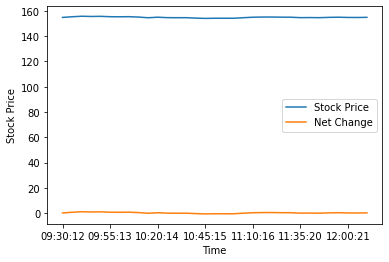

In [11]:
df = pd.read_csv("/Users/nikhilroy/Documents/WebScrapingProjects/StockMarketData.csv")
print(df)    
df.plot.line(x = "Time", y = dailyPrice, ylabel = "Stock Price" )

### Prints out Max, Min, Mean, and Median of prices from accumulated dataset

In [36]:
print("Average Stock Price: $", round(df["Stock Price"].mean(),2))
print("Median Stock Price: " , round(df["Stock Price"].median(),2))
print("Max Stock Price: " , round(df["Stock Price"].max(),2))
print("Min Stock Price: " , round(df["Stock Price"].min(),2))

Average Stock Price: $ 154.84
Median Stock Price:  154.83
Max Stock Price:  155.72
Min Stock Price:  154.01
